# 사후 검정(Post Hoc Analysis)

##1.사후 검정이란

* ANOVA 분석을 통해 집단간 차이가 있는 것을 알 수 있지만, 어떤 집단간의 차이가 있는지는 알 수 없음
* 사후검정을 통해 어떤 것에 차이가 있는지 찾을 수 있음(post hoc은 라틴어로 "after this"의 뜻)


##2.모수 통계 사후 검정의 종류


* 정규분포,등분산,동일 표본 크기
  * Tukey
    * 동일 표본의 크기일 때 가장 많이 사용, 모든 집단 조합에 대해 분석,표본수가 적을수록 정확도 낮아짐
  * Duncan
    * 엄격하지 않은 기준으로 통계적 유의성을 도출하기 쉬움(1종 오류 발생확률을 통제하지 않음)
* 정규분포,등분산,동일하지 않은 표본 크기
  * Scheffe
    * 가장 보수적이고 엄격한 사후검정 방식, 통계적 유의한 차이 도출이 쉽지 않음
  * Fisher
    * 가장 엄격하지 않은 사후 검정 방법으로 최근 연구에서 선호되지 않음(1종 오류 발생확률을 통제하지 않음)
* Games Howell
  * 정규분포,이분산,동일하지 않음 표본의 크기, 표본수 6개 미만일 경우 1종 오류 발생률 높아짐(15개 이상 권장)

* 민감도(sensitivity)로 구분 : Scheffe<Tukey<Ducan/Fisher
* Ducan의 방법은 작은 차이에도 '차이가 난다'라고 하지만, Scheffe의 방법은 확실한 차이가 나야만 비로소 차이가 있다라고 판단함

##3.폼종별 Sepal_width의 평균에 차이에 대해 사후 검정을 실행

In [10]:
!git clone https://github.com/HyeonSu-Kang/data
import pandas as pd
iris = pd.read_csv('data/iris_data.csv')
iris.columns = ['sepal_length','sepal_width','petal_length','petal_width','target']

#[7] 사후검정
from statsmodels.stats.multicomp import pairwise_tukeyhsd
posthoc = pairwise_tukeyhsd(iris.sepal_width,iris.target,alpha=0.05)
print(posthoc)

fatal: destination path 'data' already exists and is not an empty directory.
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   -0.658    0.0 -0.8189 -0.4971   True
     0      2   -0.454    0.0 -0.6149 -0.2931   True
     1      2    0.204 0.0088  0.0431  0.3649   True
----------------------------------------------------


결과를 보면 모든 그룹에서 통계적인 유의미성(P-value<0.05)을 가질 수 있는 것을 확인 할 수 있음

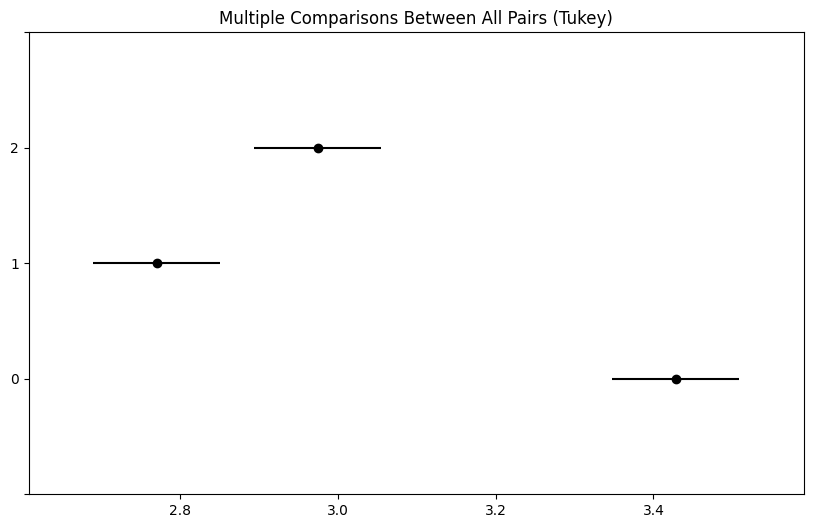

In [11]:
#[8] 그림으로 확인하기
fig = posthoc.plot_simultaneous()

* 통계적 의미를 갖지 않는 예
  * 그림에서 볼 수 있듯이, 그룹 1.0과 2.0은 서로 겹치지 않는것을 볼 수 있음
  * 반면 1과 3 , 2와 3은 겹치기 때문에 유의미한 차이가 없다고 할 수 있음

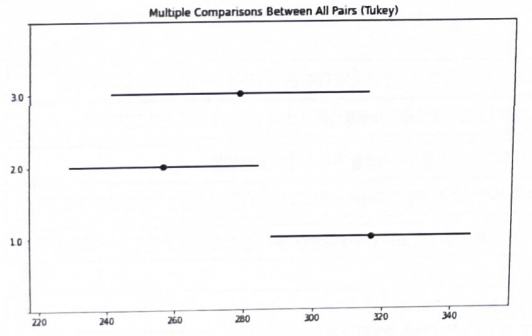